In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df=pd.read_excel('DelayedFlightsnew.xlsx')
df.head()

,FlightCode,Year,Month,DayofMonth,DayofWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircaftDelay
0,3223256,2018,1,22,7,2225,2014,56.0,2252,UA,288,N448UA,91.0,98.0,74.0,124.0,131,DEN,DSM,589,5.0,12,0,N,0,124.0,0.0,0.0,0.0,0.0
1,3223257,2018,1,23,1,2114,2014,2350.0,2252,UA,288,N838UA,96.0,98.0,82.0,58.0,60,DEN,DSM,589,3.0,11,0,N,0,0.0,0.0,0.0,0.0,58.0
2,3223259,2018,1,25,3,2046,2014,2328.0,2252,UA,288,N456UA,102.0,98.0,76.0,36.0,32,DEN,DSM,589,3.0,23,0,N,0,32.0,0.0,4.0,0.0,0.0
3,3223260,2018,1,26,4,2037,2014,2321.0,2252,UA,288,N403UA,104.0,98.0,81.0,29.0,23,DEN,DSM,589,3.0,20,0,N,0,6.0,0.0,6.0,0.0,17.0
4,3223262,2018,1,28,6,2054,2011,2322.0,2249,UA,288,N405UA,88.0,98.0,73.0,33.0,43,DEN,DSM,589,5.0,10,0,N,0,15.0,0.0,0.0,0.0,18.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88543 entries, 0 to 88542
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FlightCode         88543 non-null  int64  
 1   Year               88543 non-null  int64  
 2   Month              88543 non-null  int64  
 3   DayofMonth         88543 non-null  int64  
 4   DayofWeek          88543 non-null  int64  
 5   DepTime            88543 non-null  int64  
 6   CRSDepTime         88543 non-null  int64  
 7   ArrTime            88085 non-null  float64
 8   CRSArrTime         88543 non-null  int64  
 9   UniqueCarrier      88543 non-null  object 
 10  FlightNum          88543 non-null  int64  
 11  TailNum            88543 non-null  object 
 12  ActualElapsedTime  88085 non-null  float64
 13  CRSElapsedTime     88514 non-null  float64
 14  AirTime            88085 non-null  float64
 15  ArrDelay           88085 non-null  float64
 16  DepDelay           885

In [5]:
df.isnull().sum()

FlightCode               0
Year                     0
Month                    0
DayofMonth               0
DayofWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                458
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      458
CRSElapsedTime          29
AirTime                458
ArrDelay               458
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 458
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         26250
WeatherDelay         26250
NASDelay             26250
SecurityDelay        26250
LateAircaftDelay     26250
dtype: int64

In [6]:
df.dropna()

,FlightCode,Year,Month,DayofMonth,DayofWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircaftDelay
0,3223256,2018,1,22,7,2225,2014,56.0,2252,UA,288,N448UA,91.0,98.0,74.0,124.0,131,DEN,DSM,589,5.0,12,0,N,0,124.0,0.0,0.0,0.0,0.0
1,3223257,2018,1,23,1,2114,2014,2350.0,2252,UA,288,N838UA,96.0,98.0,82.0,58.0,60,DEN,DSM,589,3.0,11,0,N,0,0.0,0.0,0.0,0.0,58.0
2,3223259,2018,1,25,3,2046,2014,2328.0,2252,UA,288,N456UA,102.0,98.0,76.0,36.0,32,DEN,DSM,589,3.0,23,0,N,0,32.0,0.0,4.0,0.0,0.0
3,3223260,2018,1,26,4,2037,2014,2321.0,2252,UA,288,N403UA,104.0,98.0,81.0,29.0,23,DEN,DSM,589,3.0,20,0,N,0,6.0,0.0,6.0,0.0,17.0
4,3223262,2018,1,28,6,2054,2011,2322.0,2249,UA,288,N405UA,88.0,98.0,73.0,33.0,43,DEN,DSM,589,5.0,10,0,N,0,15.0,0.0,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88535,3505036,2018,12,13,5,1609,1535,1942.0,1915,AA,1496,N510AA,153.0,160.0,131.0,27.0,34,DFW,MCO,984,7.0,15,0,N,0,27.0,0.0,0.0,0.0,0.0
88536,3505037,2018,12,14,6,1616,1535,1954.0,1915,AA,1496,N559AA,158.0,160.0,136.0,39.0,41,DFW,MCO,984,11.0,11,0,N,0,11.0,0.0,0.0,0.0,28.0
88537,3505040,2018,12,17,2,1617,1535,2002.0,1915,AA,1496,N505AA,165.0,160.0,141.0,47.0,42,DFW,MCO,984,7.0,17,0,N,0,0.0,22.0,5.0,0.0,20.0
88541,3505045,2018,12,22,7,1607,1535,1941.0,1915,AA,1496,N421AA,154.0,160.0,137.0,26.0,32,DFW,MCO,984,5.0,12,0,N,0,1.0,0.0,0.0,0.0,25.0


In [7]:
df.isnull().sum()

FlightCode               0
Year                     0
Month                    0
DayofMonth               0
DayofWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                458
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      458
CRSElapsedTime          29
AirTime                458
ArrDelay               458
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 458
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         26250
WeatherDelay         26250
NASDelay             26250
SecurityDelay        26250
LateAircaftDelay     26250
dtype: int64

In [8]:
cols_to_drop = ['TailNum','ArrDelay','DepDelay','TaxiIn','TaxiOut','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircaftDelay']
df.drop(columns= cols_to_drop,inplace=True)
df.head()

,FlightCode,Year,Month,DayofMonth,DayofWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,Cancelled,CancellationCode
0,3223256,2018,1,22,7,2225,2014,56.0,2252,UA,288,91.0,98.0,74.0,DEN,DSM,589,0,N
1,3223257,2018,1,23,1,2114,2014,2350.0,2252,UA,288,96.0,98.0,82.0,DEN,DSM,589,0,N
2,3223259,2018,1,25,3,2046,2014,2328.0,2252,UA,288,102.0,98.0,76.0,DEN,DSM,589,0,N
3,3223260,2018,1,26,4,2037,2014,2321.0,2252,UA,288,104.0,98.0,81.0,DEN,DSM,589,0,N
4,3223262,2018,1,28,6,2054,2011,2322.0,2249,UA,288,88.0,98.0,73.0,DEN,DSM,589,0,N


In [9]:
df['DepDelay']= df['DepTime']-df['CRSDepTime']
df['ArrDelay']= df['ArrTime']-df['CRSArrTime']
df

,FlightCode,Year,Month,DayofMonth,DayofWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,Cancelled,CancellationCode,DepDelay,ArrDelay
0,3223256,2018,1,22,7,2225,2014,56.0,2252,UA,288,91.0,98.0,74.0,DEN,DSM,589,0,N,211,-2196.0
1,3223257,2018,1,23,1,2114,2014,2350.0,2252,UA,288,96.0,98.0,82.0,DEN,DSM,589,0,N,100,98.0
2,3223259,2018,1,25,3,2046,2014,2328.0,2252,UA,288,102.0,98.0,76.0,DEN,DSM,589,0,N,32,76.0
3,3223260,2018,1,26,4,2037,2014,2321.0,2252,UA,288,104.0,98.0,81.0,DEN,DSM,589,0,N,23,69.0
4,3223262,2018,1,28,6,2054,2011,2322.0,2249,UA,288,88.0,98.0,73.0,DEN,DSM,589,0,N,43,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88538,3505042,2018,12,19,4,1551,1535,1923.0,1915,AA,1496,152.0,160.0,127.0,DFW,MCO,984,0,N,16,8.0
88539,3505043,2018,12,20,5,1555,1535,1927.0,1915,AA,1496,152.0,160.0,132.0,DFW,MCO,984,0,N,20,12.0
88540,3505044,2018,12,21,6,1555,1535,1917.0,1915,AA,1496,142.0,160.0,124.0,DFW,MCO,984,0,N,20,2.0
88541,3505045,2018,12,22,7,1607,1535,1941.0,1915,AA,1496,154.0,160.0,137.0,DFW,MCO,984,0,N,72,26.0


In [10]:
#df= pd.DataFrame({'ArrTime'})
#df = df.astype(str)
#print(df.dtypes)


In [11]:
#df.info()

In [12]:
def generate_readable_time(data):
    if isinstance(data, int):
        data = list(str(data))
        if len(data) == 4:
            data = f"{data[0]}{data[1]}:{data[2]}{data[3]}"
        elif len(data) == 3:
            data = f"0{data[0]}:{data[1]}{data[2]}"
        elif len(data) == 2:
            data = f"00:{data[0]}{data[1]}"
        elif len(data) == 1:
            data = f"00:0{data[0]}"
        else:
            print(data)
        return data

df['DepTime'].apply(generate_readable_time)
df['CRSDepTime'].apply(generate_readable_time)
#df['ArrTime'].apply(generate_readable_time)
df['CRSArrTime'].apply(generate_readable_time)


0        22:52
1        22:52
2        22:52
3        22:52
4        22:49
         ...  
88538    19:15
88539    19:15
88540    19:15
88541    19:15
88542    19:15
Name: CRSArrTime, Length: 88543, dtype: object

In [13]:
df['DepTime']= df['DepTime'].apply(generate_readable_time)
df['CRSDepTime']=df['CRSDepTime'].apply(generate_readable_time)
df['ArrTime']=df['ArrTime'].apply(generate_readable_time)
df['CRSArrTime']=df['CRSArrTime'].apply(generate_readable_time)
df

,FlightCode,Year,Month,DayofMonth,DayofWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,Cancelled,CancellationCode,DepDelay,ArrDelay
0,3223256,2018,1,22,7,22:25,20:14,None,22:52,UA,288,91.0,98.0,74.0,DEN,DSM,589,0,N,211,-2196.0
1,3223257,2018,1,23,1,21:14,20:14,None,22:52,UA,288,96.0,98.0,82.0,DEN,DSM,589,0,N,100,98.0
2,3223259,2018,1,25,3,20:46,20:14,None,22:52,UA,288,102.0,98.0,76.0,DEN,DSM,589,0,N,32,76.0
3,3223260,2018,1,26,4,20:37,20:14,None,22:52,UA,288,104.0,98.0,81.0,DEN,DSM,589,0,N,23,69.0
4,3223262,2018,1,28,6,20:54,20:11,None,22:49,UA,288,88.0,98.0,73.0,DEN,DSM,589,0,N,43,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88538,3505042,2018,12,19,4,15:51,15:35,None,19:15,AA,1496,152.0,160.0,127.0,DFW,MCO,984,0,N,16,8.0
88539,3505043,2018,12,20,5,15:55,15:35,None,19:15,AA,1496,152.0,160.0,132.0,DFW,MCO,984,0,N,20,12.0
88540,3505044,2018,12,21,6,15:55,15:35,None,19:15,AA,1496,142.0,160.0,124.0,DFW,MCO,984,0,N,20,2.0
88541,3505045,2018,12,22,7,16:07,15:35,None,19:15,AA,1496,154.0,160.0,137.0,DFW,MCO,984,0,N,72,26.0


In [14]:
df

,FlightCode,Year,Month,DayofMonth,DayofWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,Cancelled,CancellationCode,DepDelay,ArrDelay
0,3223256,2018,1,22,7,22:25,20:14,None,22:52,UA,288,91.0,98.0,74.0,DEN,DSM,589,0,N,211,-2196.0
1,3223257,2018,1,23,1,21:14,20:14,None,22:52,UA,288,96.0,98.0,82.0,DEN,DSM,589,0,N,100,98.0
2,3223259,2018,1,25,3,20:46,20:14,None,22:52,UA,288,102.0,98.0,76.0,DEN,DSM,589,0,N,32,76.0
3,3223260,2018,1,26,4,20:37,20:14,None,22:52,UA,288,104.0,98.0,81.0,DEN,DSM,589,0,N,23,69.0
4,3223262,2018,1,28,6,20:54,20:11,None,22:49,UA,288,88.0,98.0,73.0,DEN,DSM,589,0,N,43,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88538,3505042,2018,12,19,4,15:51,15:35,None,19:15,AA,1496,152.0,160.0,127.0,DFW,MCO,984,0,N,16,8.0
88539,3505043,2018,12,20,5,15:55,15:35,None,19:15,AA,1496,152.0,160.0,132.0,DFW,MCO,984,0,N,20,12.0
88540,3505044,2018,12,21,6,15:55,15:35,None,19:15,AA,1496,142.0,160.0,124.0,DFW,MCO,984,0,N,20,2.0
88541,3505045,2018,12,22,7,16:07,15:35,None,19:15,AA,1496,154.0,160.0,137.0,DFW,MCO,984,0,N,72,26.0


In [15]:
print(df.dtypes)

FlightCode             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayofWeek              int64
DepTime               object
CRSDepTime            object
ArrTime               object
CRSArrTime            object
UniqueCarrier         object
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
Origin                object
Dest                  object
Distance               int64
Cancelled              int64
CancellationCode      object
DepDelay               int64
ArrDelay             float64
dtype: object


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88543 entries, 0 to 88542
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FlightCode         88543 non-null  int64  
 1   Year               88543 non-null  int64  
 2   Month              88543 non-null  int64  
 3   DayofMonth         88543 non-null  int64  
 4   DayofWeek          88543 non-null  int64  
 5   DepTime            88543 non-null  object 
 6   CRSDepTime         88543 non-null  object 
 7   ArrTime            0 non-null      object 
 8   CRSArrTime         88543 non-null  object 
 9   UniqueCarrier      88543 non-null  object 
 10  FlightNum          88543 non-null  int64  
 11  ActualElapsedTime  88085 non-null  float64
 12  CRSElapsedTime     88514 non-null  float64
 13  AirTime            88085 non-null  float64
 14  Origin             88543 non-null  object 
 15  Dest               88543 non-null  object 
 16  Distance           885

In [17]:
df.DepDelay

0        211
1        100
2         32
3         23
4         43
        ... 
88538     16
88539     20
88540     20
88541     72
88542     73
Name: DepDelay, Length: 88543, dtype: int64

In [18]:
# Create two columns with Ontime, Late and Cancelled status for both departure and arrival
df.loc[df.DepDelay.isna(), "dep_status"]="Cancelled"
df.loc[df.DepDelay <= 0, "dep_status"]="OnTime"
df.loc[df.DepDelay > 0, "dep_status"]="Late"
df.loc[df.ArrDelay.isna(), "arr_status"]="Cancelled"
df.loc[df.ArrDelay <= 0, "arr_status"]="OnTime"
df.loc[df.ArrDelay > 0, "arr_status"]="Late"
df

,FlightCode,Year,Month,DayofMonth,DayofWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,Cancelled,CancellationCode,DepDelay,ArrDelay,dep_status,arr_status
0,3223256,2018,1,22,7,22:25,20:14,None,22:52,UA,288,91.0,98.0,74.0,DEN,DSM,589,0,N,211,-2196.0,Late,OnTime
1,3223257,2018,1,23,1,21:14,20:14,None,22:52,UA,288,96.0,98.0,82.0,DEN,DSM,589,0,N,100,98.0,Late,Late
2,3223259,2018,1,25,3,20:46,20:14,None,22:52,UA,288,102.0,98.0,76.0,DEN,DSM,589,0,N,32,76.0,Late,Late
3,3223260,2018,1,26,4,20:37,20:14,None,22:52,UA,288,104.0,98.0,81.0,DEN,DSM,589,0,N,23,69.0,Late,Late
4,3223262,2018,1,28,6,20:54,20:11,None,22:49,UA,288,88.0,98.0,73.0,DEN,DSM,589,0,N,43,73.0,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88538,3505042,2018,12,19,4,15:51,15:35,None,19:15,AA,1496,152.0,160.0,127.0,DFW,MCO,984,0,N,16,8.0,Late,Late
88539,3505043,2018,12,20,5,15:55,15:35,None,19:15,AA,1496,152.0,160.0,132.0,DFW,MCO,984,0,N,20,12.0,Late,Late
88540,3505044,2018,12,21,6,15:55,15:35,None,19:15,AA,1496,142.0,160.0,124.0,DFW,MCO,984,0,N,20,2.0,Late,Late
88541,3505045,2018,12,22,7,16:07,15:35,None,19:15,AA,1496,154.0,160.0,137.0,DFW,MCO,984,0,N,72,26.0,Late,Late


In [19]:
from datetime import datetime
def dep_delay_in_minute(scheduled, actual):
    t1 = datetime.strptime(scheduled, "%H:%M")
    t2 = datetime.strptime(actual, "%H:%M")
    delta = t2 - t1
    ms = delta.total_seconds() / 60
    return ms

dep_delay_in_minute('20:00','21:20')

80.0

## Flight Frequency

Busiest Aircraft on basis of Flights Arrival  


In [20]:
buzArr = df.groupby(['Origin'])['Origin'].count()
buzArr

Origin
ABE     40
ABI     39
ABQ    207
ABY     17
ACT     27
      ... 
TYR     20
TYS    193
VLD     17
VPS    166
XNA    249
Name: Origin, Length: 228, dtype: int64

<Axes: xlabel='Origin'>

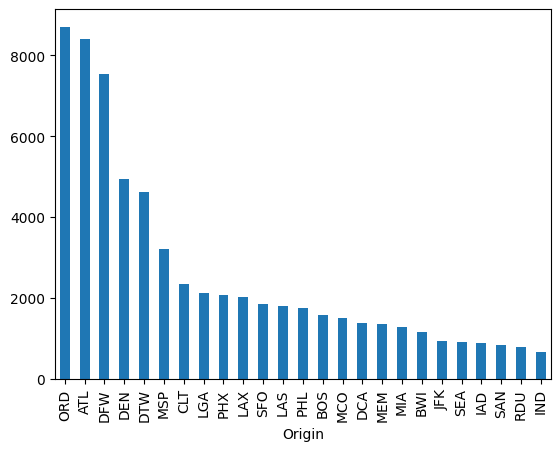

In [21]:
(df.Origin ).value_counts().head(25).plot(kind='bar')

## Busiest airport in terms of Flights departure

<Axes: xlabel='Dest'>

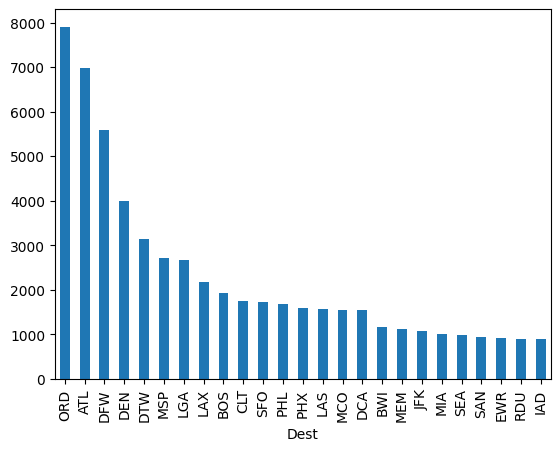

In [23]:
(df.Dest ).value_counts().head(25).plot(kind='bar')

## Popular Routes

<Axes: >

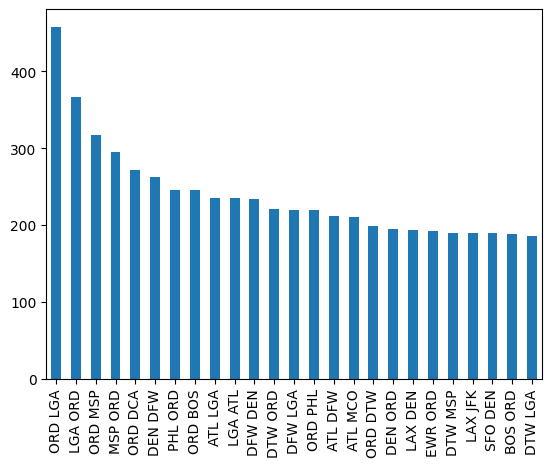

In [24]:
(df.Origin+' '+df.Dest ).value_counts().head(25).plot(kind='bar')

## Flights frequency across months

In [25]:
buzMonth = df.groupby(['Month'])['Month'].count()
buzMonth

Month
1     5699
2     7199
3     9001
4     8001
5     8732
6     7845
7     9011
8     8971
9     8996
10    5011
11    5478
12    4599
Name: Month, dtype: int64

<Axes: title={'center': 'Flights frequency across months'}, xlabel='Month'>

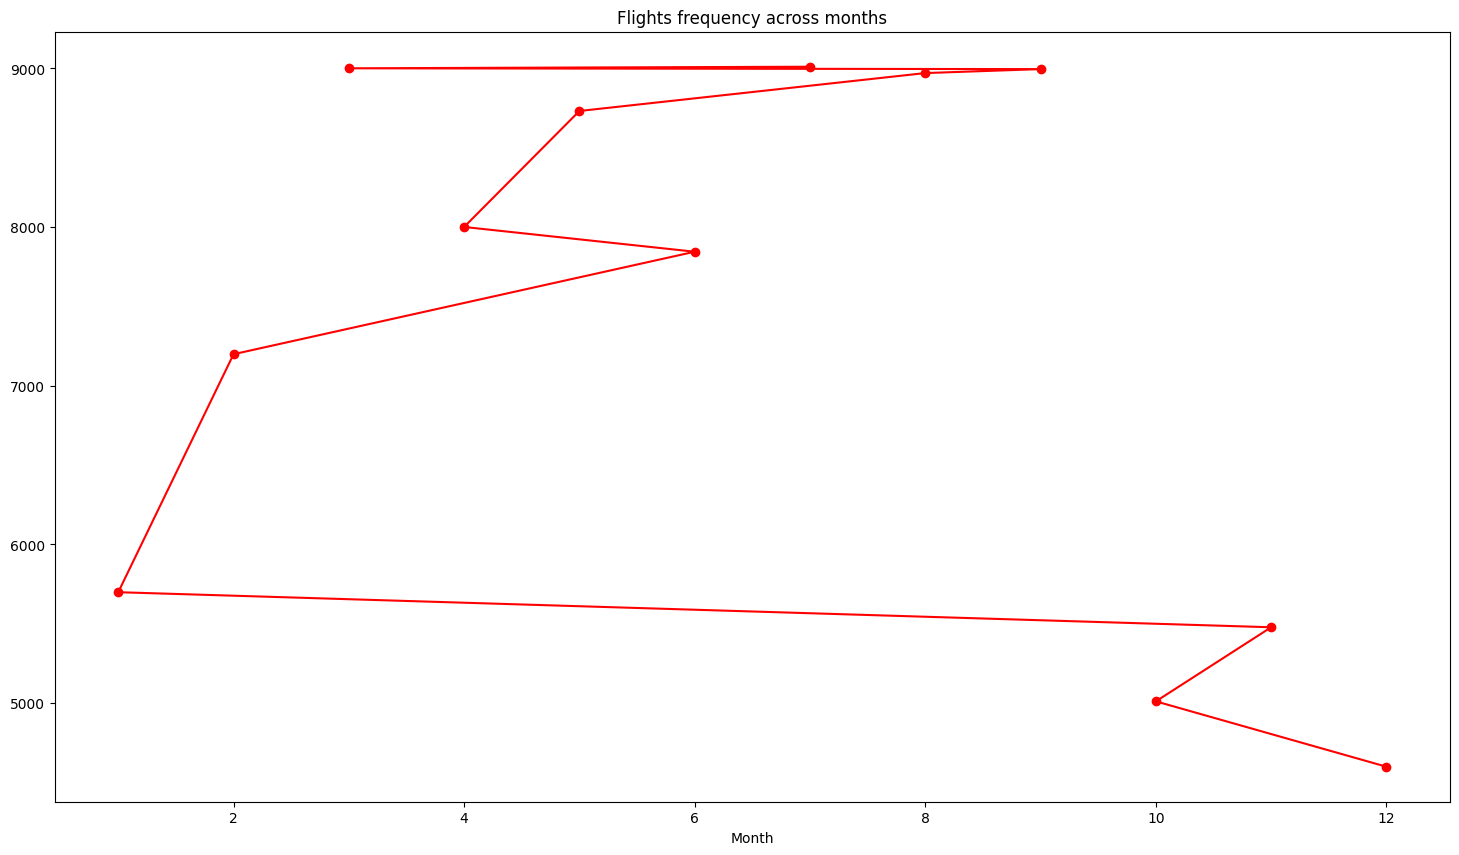

In [26]:
(df.Month).value_counts().plot(figsize=(18,10),
                          kind='line',
                          title= "Flights frequency across months",
                          style='ro-',)

## Flight Status

Departure and Arrival Status

In [27]:
DepStatus=df.groupby(['dep_status'])['dep_status'].count()
DepStatus

dep_status
Late      87462
OnTime     1081
Name: dep_status, dtype: int64

In [28]:
fig= px.pie(DepStatus,DepStatus.index, DepStatus.values)
fig.show()

In [29]:
ArrStatus=df.groupby(['arr_status'])['arr_status'].count()
ArrStatus

arr_status
Cancelled      458
Late         76777
OnTime       11308
Name: arr_status, dtype: int64

In [30]:
fig= px.pie(ArrStatus,ArrStatus.index, ArrStatus.values)
fig.show()

# Delayed Flights

## Best and worst airport in terms of departure and arrival delay

In [31]:
depAir = df.loc[df['dep_status'] == 'Late'].groupby(['Origin','dep_status'])['dep_status'].count()
depAir

Origin  dep_status
ABE     Late           40
ABI     Late           39
ABQ     Late          207
ABY     Late           17
ACT     Late           27
                     ... 
TYR     Late           20
TYS     Late          193
VLD     Late           17
VPS     Late          165
XNA     Late          249
Name: dep_status, Length: 228, dtype: int64

<Axes: title={'center': 'Departure delay w.r.t Airports'}, xlabel='Origin,dep_status'>

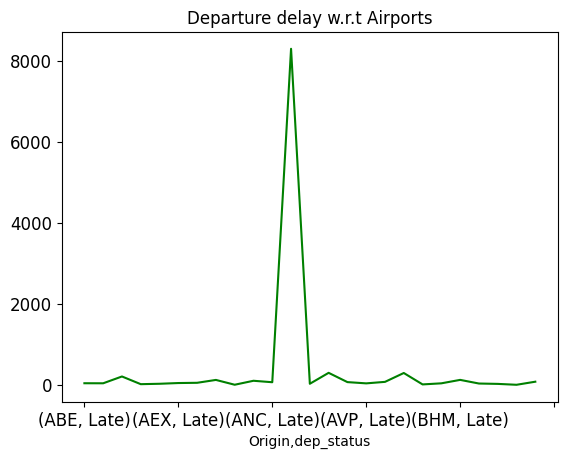

In [32]:
depAir.head(25).plot(title ="Departure delay w.r.t Airports", legend=False, fontsize=12,style='g')

In [33]:
ArrAir = df.loc[df['arr_status'] == 'Late'].groupby(['Origin','arr_status'])['arr_status'].count()
ArrAir

Origin  arr_status
ABE     Late           36
ABI     Late           38
ABQ     Late          191
ABY     Late           17
ACT     Late           26
                     ... 
TYR     Late           19
TYS     Late          178
VLD     Late           17
VPS     Late          159
XNA     Late          236
Name: arr_status, Length: 228, dtype: int64

<Axes: title={'center': 'Arrival delay w.r.t Airports'}, xlabel='Origin,arr_status'>

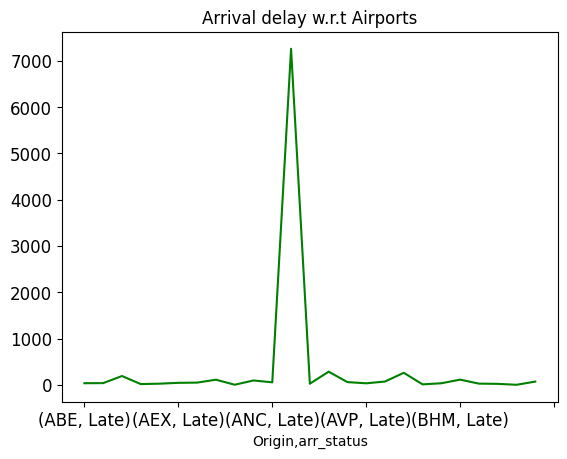

In [34]:
ArrAir.head(25).plot(title ="Arrival delay w.r.t Airports", legend=False, fontsize=12,style='g')

# Cancelled Flights

## Best and worst airport in terms of number of flights cancelled

In [35]:
bwAir=df.loc[df['arr_status'] == 'Cancelled'].groupby(['Origin','arr_status'])['arr_status'].count()
bwAir

Origin  arr_status
ABQ     Cancelled      1
ANC     Cancelled      1
ATL     Cancelled     19
BDL     Cancelled      4
BHM     Cancelled      1
                      ..
TUL     Cancelled      1
TUS     Cancelled      1
TYS     Cancelled      2
VPS     Cancelled      1
XNA     Cancelled      1
Name: arr_status, Length: 95, dtype: int64

<Axes: title={'center': 'Best and worst Airport w.r.t total flight cancelled'}, xlabel='Origin,arr_status'>

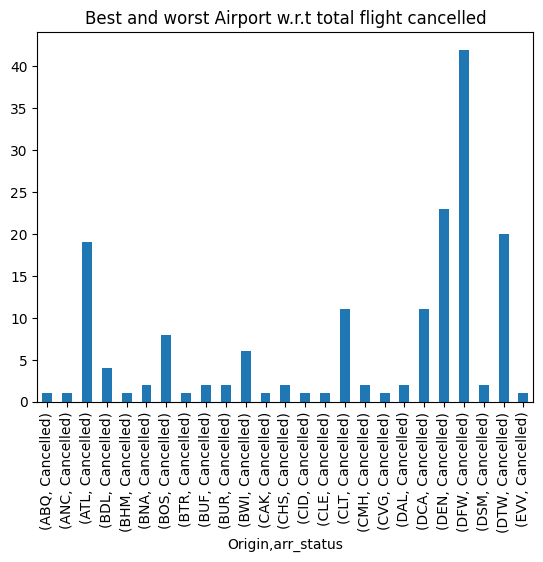

In [36]:
bwAir.head(25).plot(kind='bar',title='Best and worst Airport w.r.t total flight cancelled')

## Best and worst carrier w.r.t total flight cancelled

In [37]:
df.loc[df['arr_status'] == 'Cancelled'].groupby(['UniqueCarrier','arr_status'])['arr_status'].count()

UniqueCarrier  arr_status
9E             Cancelled      28
AA             Cancelled     120
DL             Cancelled      24
F9             Cancelled       9
FL             Cancelled      46
MQ             Cancelled      74
NW             Cancelled      37
OH             Cancelled       1
UA             Cancelled      55
US             Cancelled      62
WN             Cancelled       2
Name: arr_status, dtype: int64

<Axes: title={'center': 'Best and worst carrier w.r.t total flight cancelled'}, ylabel='arr_status'>

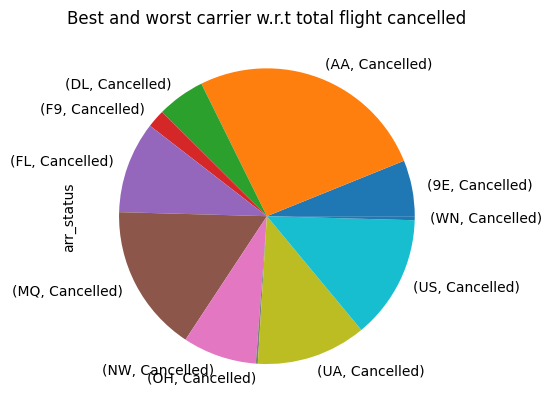

In [39]:
df.loc[df['arr_status'] == 'Cancelled'].groupby(['UniqueCarrier','arr_status'])['arr_status'].count().plot(kind='pie',title='Best and worst carrier w.r.t total flight cancelled')

## Flight cancellation across months

In [40]:
MonthCancel=df.loc[df['arr_status'] == 'Cancelled'].groupby(['Month','arr_status'])['arr_status'].count()
MonthCancel

Month  arr_status
1      Cancelled     23
2      Cancelled     30
3      Cancelled     58
4      Cancelled     32
5      Cancelled      9
6      Cancelled     46
7      Cancelled     44
8      Cancelled     32
9      Cancelled     42
10     Cancelled     44
11     Cancelled     61
12     Cancelled     37
Name: arr_status, dtype: int64

<Axes: title={'center': 'Flight cancellation across months'}, xlabel='Month,arr_status'>

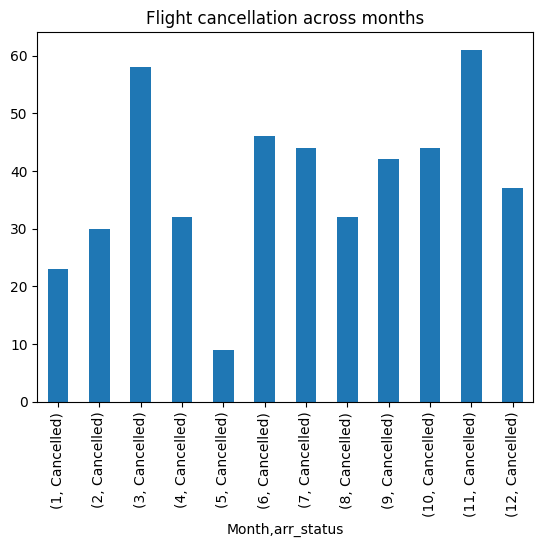

In [41]:
MonthCancel.plot(kind='bar',title='Flight cancellation across months')

## Flight speed

In [42]:
df['Speed'] = df['Distance']/(df['ActualElapsedTime']/60)
df

,FlightCode,Year,Month,DayofMonth,DayofWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,Cancelled,CancellationCode,DepDelay,ArrDelay,dep_status,arr_status,Speed
0,3223256,2018,1,22,7,22:25,20:14,None,22:52,UA,288,91.0,98.0,74.0,DEN,DSM,589,0,N,211,-2196.0,Late,OnTime,388.351648
1,3223257,2018,1,23,1,21:14,20:14,None,22:52,UA,288,96.0,98.0,82.0,DEN,DSM,589,0,N,100,98.0,Late,Late,368.125000
2,3223259,2018,1,25,3,20:46,20:14,None,22:52,UA,288,102.0,98.0,76.0,DEN,DSM,589,0,N,32,76.0,Late,Late,346.470588
3,3223260,2018,1,26,4,20:37,20:14,None,22:52,UA,288,104.0,98.0,81.0,DEN,DSM,589,0,N,23,69.0,Late,Late,339.807692
4,3223262,2018,1,28,6,20:54,20:11,None,22:49,UA,288,88.0,98.0,73.0,DEN,DSM,589,0,N,43,73.0,Late,Late,401.590909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88538,3505042,2018,12,19,4,15:51,15:35,None,19:15,AA,1496,152.0,160.0,127.0,DFW,MCO,984,0,N,16,8.0,Late,Late,388.421053
88539,3505043,2018,12,20,5,15:55,15:35,None,19:15,AA,1496,152.0,160.0,132.0,DFW,MCO,984,0,N,20,12.0,Late,Late,388.421053
88540,3505044,2018,12,21,6,15:55,15:35,None,19:15,AA,1496,142.0,160.0,124.0,DFW,MCO,984,0,N,20,2.0,Late,Late,415.774648
88541,3505045,2018,12,22,7,16:07,15:35,None,19:15,AA,1496,154.0,160.0,137.0,DFW,MCO,984,0,N,72,26.0,Late,Late,383.376623


### Average flight speed across all carriers

In [43]:
flightSpeed = df.groupby(['UniqueCarrier'])['Speed'].mean()
flightSpeed

UniqueCarrier
9E    263.832884
AA    357.674866
DL    327.308669
EV    269.573049
F9    362.373169
FL    328.704101
HA    276.017865
MQ    257.101568
NW    306.824230
OH    271.654525
UA    342.858517
US    330.182710
WN    334.919948
Name: Speed, dtype: float64

<Axes: title={'center': 'Average flight speed across all carriers'}, xlabel='UniqueCarrier'>

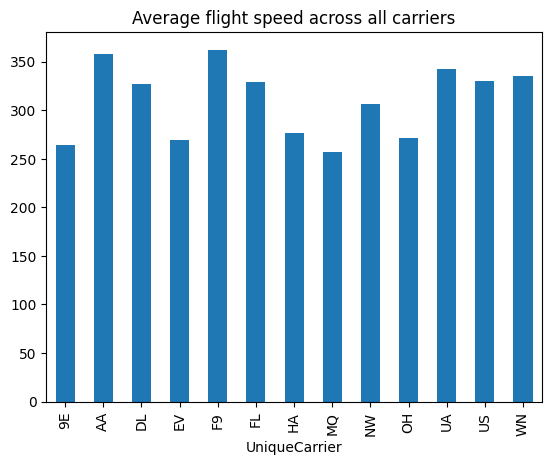

In [44]:
flightSpeed.plot(kind='bar', title='Average flight speed across all carriers')